https://colab.research.google.com/drive/1sigsCZl_7vFuS3qcnU-bQOlRjruJs7Yn?usp=sharing

In [1]:
from keras.datasets import fashion_mnist
import numpy as np
from keras.models import Sequential
from keras.layers import InputLayer, Reshape, Conv2DTranspose, LeakyReLU
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.models import load_model

In [2]:
import tensorflow as tf


In [3]:
(trainX, trainy), (testX, testy) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# Data Visualization

In [4]:
import matplotlib.pyplot as plt


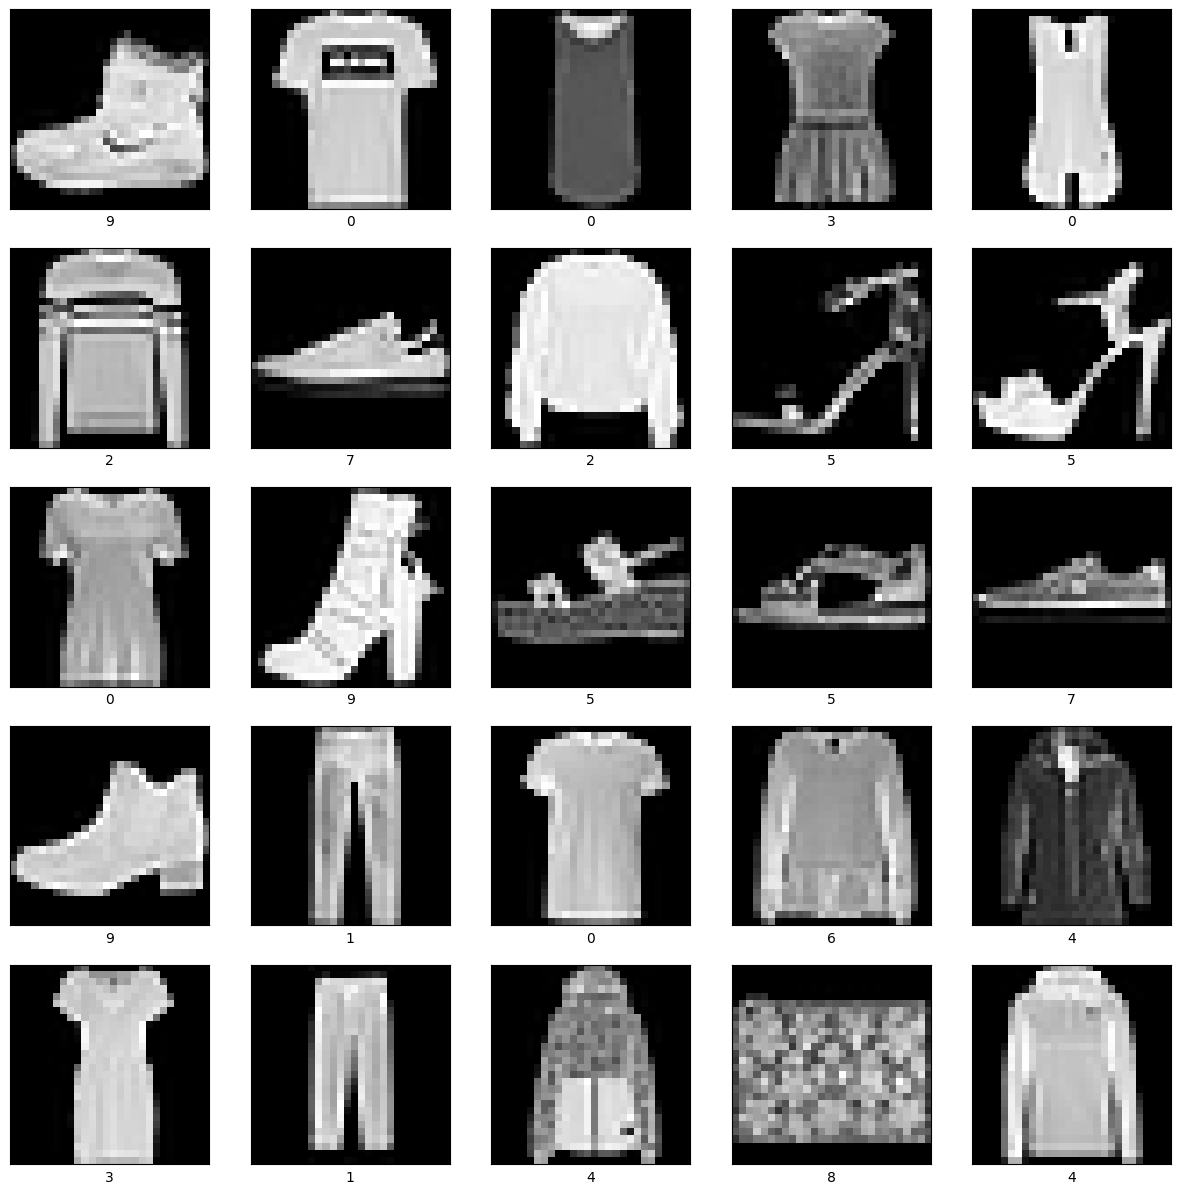

In [5]:
# plt.imshow(trainX[0], cmap="gray")
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainX[i], cmap='gray')
    plt.xlabel(trainy[i])
plt.show()

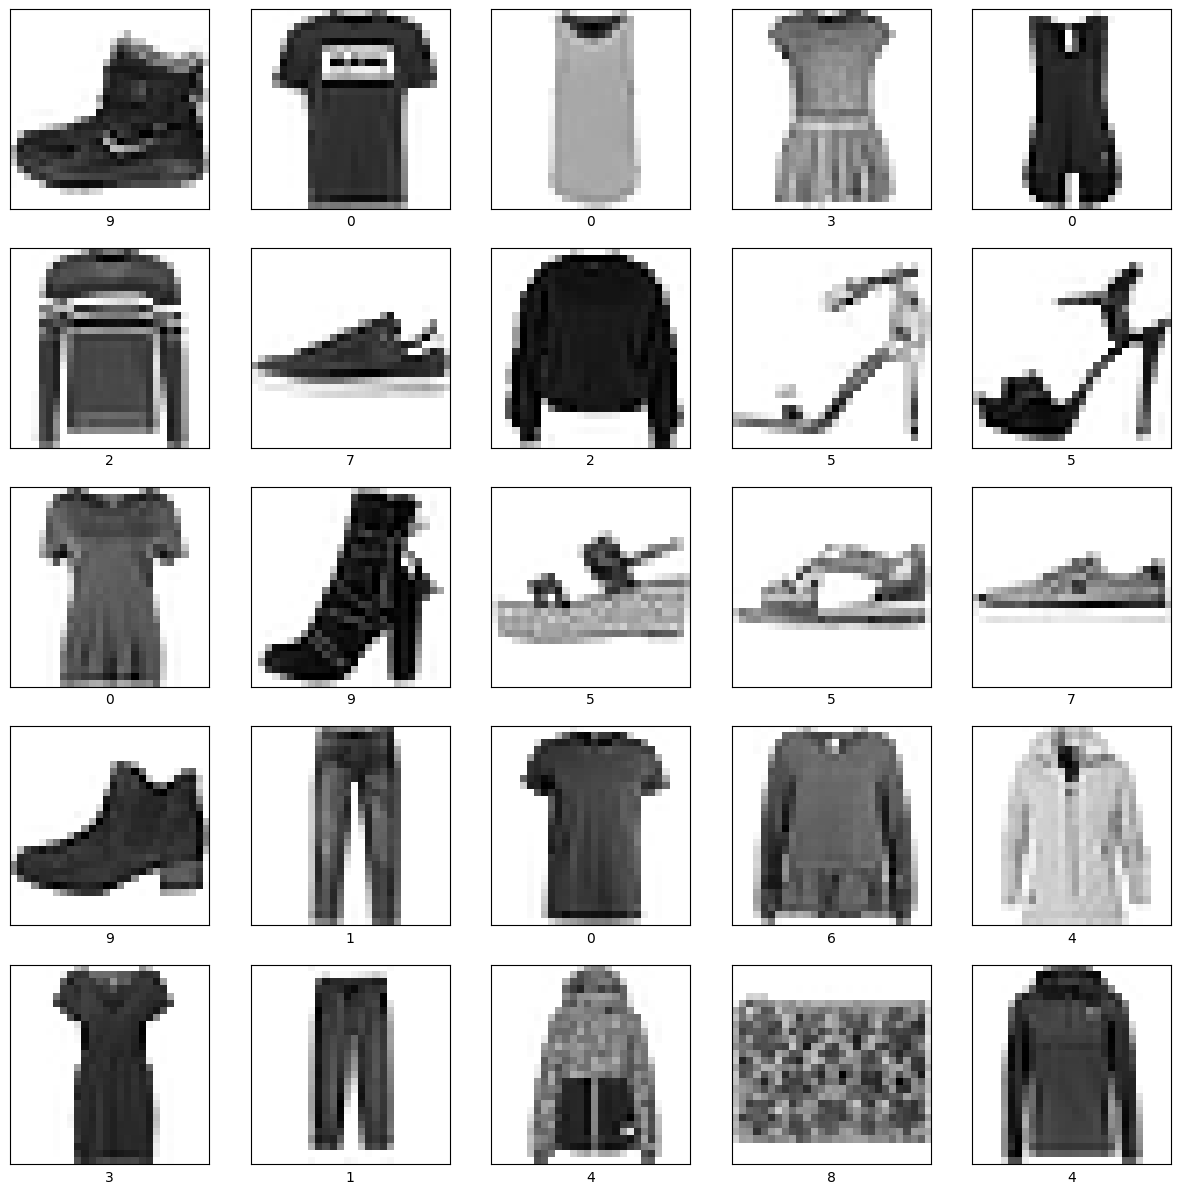

In [6]:
# plt.imshow(trainX[0], cmap='gray_r')
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainX[i], cmap='gray_r')
    plt.xlabel(trainy[i])
plt.show()

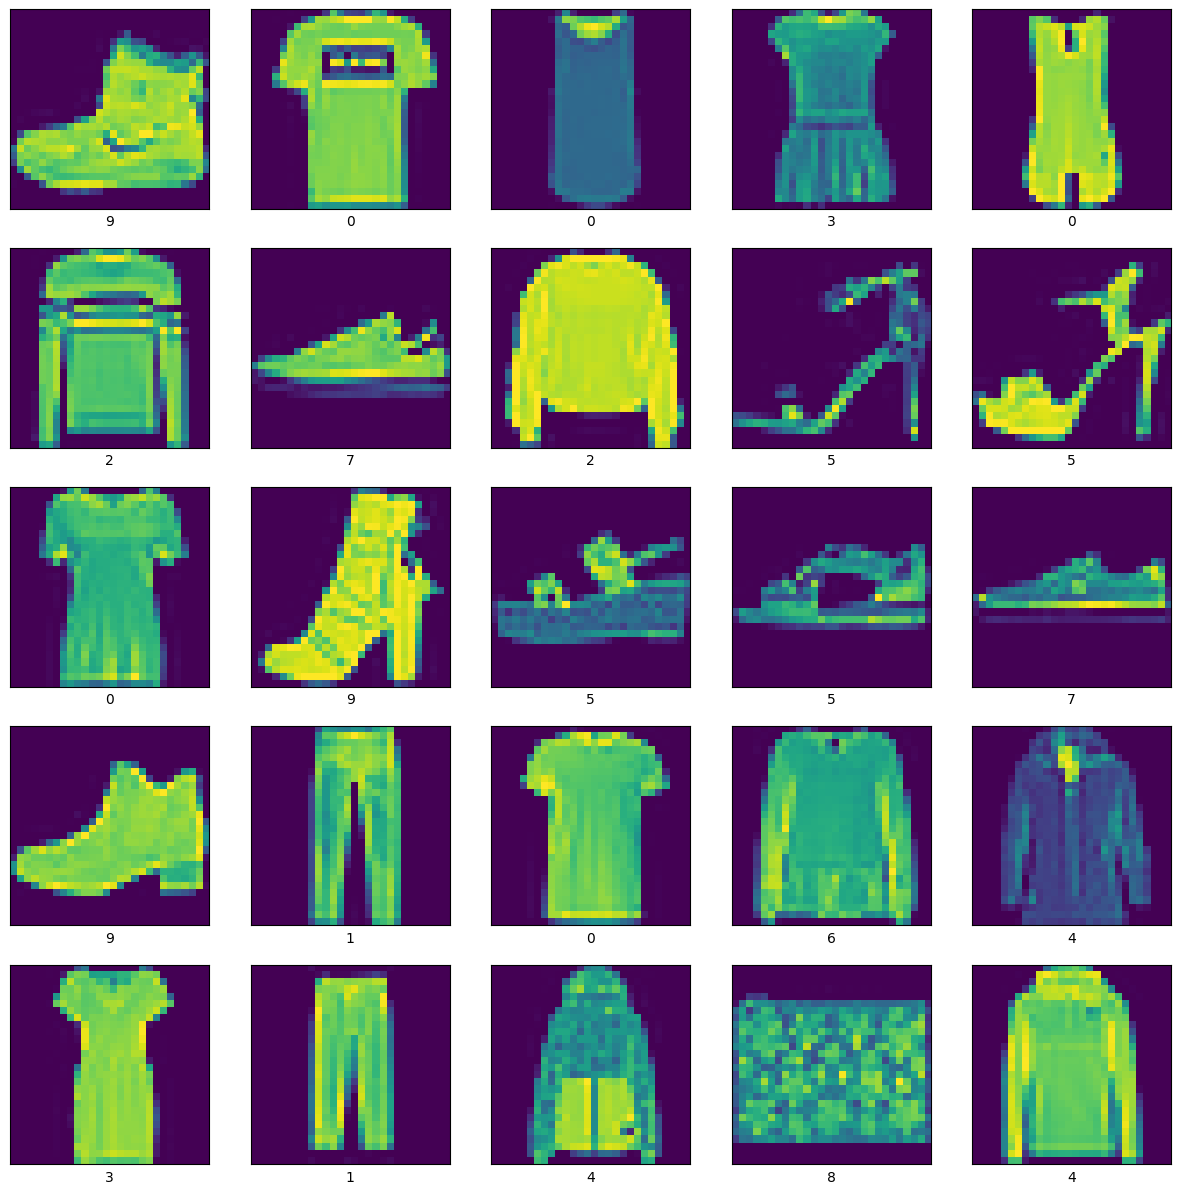

In [7]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainX[i])
    plt.xlabel(trainy[i])
plt.show()

#3 Normalize the data

In [8]:
# (x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()


In [9]:
trainX.shape[1:]

(28, 28)

In [10]:
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

trainX = trainX / 255.0
testX = testX / 255.0

In [11]:
trainX.shape[1:]

(28, 28, 1)

In [12]:
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(32, (3,3), strides=(2, 2), padding='same', input_shape=in_shape, activation='relu'))
	# model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', activation='relu'))
	# model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

In [13]:
discriminator = define_discriminator()
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 1)                 3137      
                                                                 
Total params: 21953 (85.75 KB)
Trainable params: 21953 (

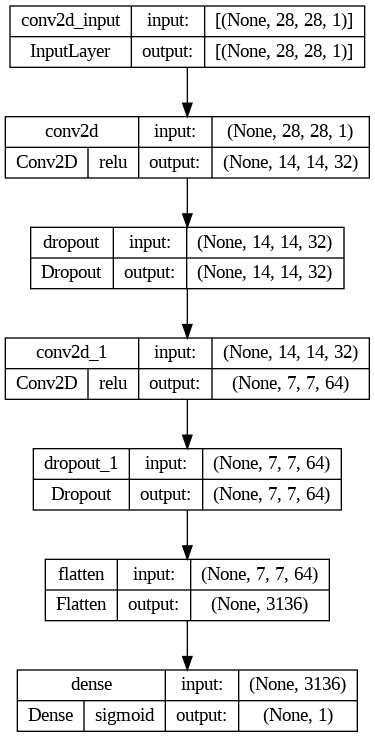

In [14]:
plot_model(discriminator, show_shapes=True, show_layer_names=True, show_layer_activations=True)

# 5 Build Generator

In [15]:
# def define_generator(latent_dim):
# 	model = Sequential()

# 	n_nodes = 128 * 7 * 7
# 	model.add(Dense(n_nodes, input_dim=latent_dim))
# 	model.add(LeakyReLU(alpha=0.2))
# 	model.add(Reshape((7, 7, 128)))

# 	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
# 	model.add(LeakyReLU(alpha=0.2))

# 	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
# 	model.add(LeakyReLU(alpha=0.2))
# 	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
# 	return model

def define_generator(latent_dim):
	model = Sequential()

	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim,activation='relu'))
	# model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))

	model.add(Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', activation='relu'))
	# model.add(LeakyReLU(alpha=0.2))

	model.add(Conv2DTranspose(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	# model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, kernel_size=(3,3), strides=(1,1), padding='same', activation='sigmoid'))
	return model
	# from tensorflow.keras.models import Sequential
	# from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose, Conv2D

	# # Define the latent dimension
	# latent_dim = 100

	# # Create the generator model
	# generator = Sequential()

	# # Dense layer
	# generator.add(Dense(128 * 7 * 7, input_dim=latent_dim, activation='relu'))

	# # Reshape layer
	# generator.add(Reshape((7, 7, 128)))

	# # First Conv2DTranspose layer
	# generator.add(Conv2DTranspose(64, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu'))

	# # Second Conv2DTranspose layer
	# generator.add(Conv2DTranspose(32, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu'))

	# # Regular Conv2D layer
	# generator.add(Conv2D(1, kernel_size=(3,3), strides=(1,1), padding='same', activation='sigmoid'))

	# # Display the summary of the generator model




In [16]:
generator = define_generator(100)
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              633472    
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 64)        73792     
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 32)        18464     
 Transpose)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         289       
                                                                 
Total params: 726017 (2.77 MB)
Trainable params: 72601

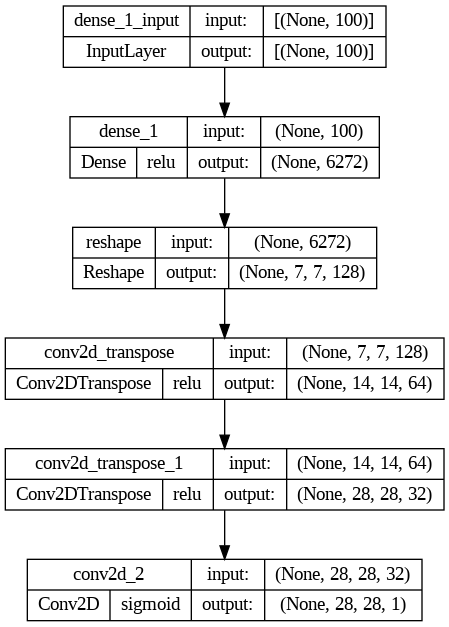

In [17]:
plot_model(generator, show_shapes=True, show_layer_names=True, show_layer_activations=True)

## Build GAN

In [18]:
def define_gan(generator, discriminator):

	discriminator.trainable = False

	model = Sequential()
	model.add(generator)
	model.add(discriminator)

	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

In [19]:
gan = define_gan(generator, discriminator)
gan.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 28, 28, 1)         726017    
                                                                 
 sequential (Sequential)     (None, 1)                 21953     
                                                                 
Total params: 747970 (2.85 MB)
Trainable params: 726017 (2.77 MB)
Non-trainable params: 21953 (85.75 KB)
_________________________________________________________________


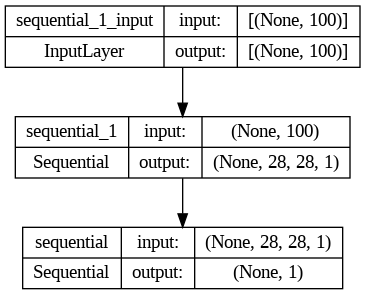

In [20]:
plot_model(gan, show_shapes=True, show_layer_names=True, show_layer_activations=True)

## Train GAN

### Define configauration parameters

In [21]:
batch_size = 256
# n_epochs = 5
n_epochs = 30
bat_per_epo = int(trainX.shape[0] / batch_size)
half_batch = int(batch_size / 2)
latent_dim = 100

### Create helper functions first

#### define a function generate real samples from training set images

In [22]:
def generate_real_samples(dataset, n_samples):
	ix = np.random.randint(0, dataset.shape[0], n_samples)
	X = dataset[ix]
	y = np.ones((n_samples, 1))
	return X, y

#### define a function generate fake samples from normal distrubion by using generator model

In [23]:
def generate_fake_samples(generator, latent_dim, n_samples):
  x_input = np.random.randn(latent_dim * n_samples)
  x_input = x_input.reshape(n_samples, latent_dim)
  X = generator.predict(x_input)
  y = np.zeros((n_samples, 1))
  return X, y

#### define a funciton save a plot of generated images

In [24]:
def save_plot(examples, epoch, n=10):
	for i in range(n * n):
		plt.subplot(n, n, 1 + i)
		plt.axis('off')
		plt.imshow(examples[i, :, :, 0], cmap='gray_r')
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	plt.savefig(filename)
	plt.close()

#### define a function evaluate the model

In [25]:
def evaluate(epoch, generator, discriminator, dataset, latent_dim, n_samples=100):

	X_real, y_real = generate_real_samples(dataset, n_samples)
	_, acc_real = discriminator.evaluate(X_real, y_real, verbose=0)

	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n_samples)
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)

	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

	save_plot(x_fake, epoch)
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	generator.save(filename)

### Traning main loop

In [26]:
print(half_batch)

128


In [27]:
print("Array shape:", trainX.shape)


Array shape: (60000, 28, 28, 1)


In [28]:
for i in range(n_epochs):

    for j in range(bat_per_epo):

      X_real, y_real = generate_real_samples(trainX, half_batch)
      X_fake, y_fake = generate_fake_samples(generator, latent_dim, half_batch)
      X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
      d_loss, _ = discriminator.train_on_batch(X, y)

      X_gan = np.random.randn(latent_dim * batch_size)
      X_gan = X_gan.reshape(batch_size, latent_dim)
      y_gan = np.ones((batch_size, 1))
      g_loss = gan.train_on_batch(X_gan, y_gan)

      print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))

    if (i+1) % 10 == 0:
      evaluate(i, generator, discriminator, trainX, latent_dim)

    evaluate(i, generator, discriminator, trainX, latent_dim)

4/4 [==============================] - 0s 20ms/step
>1, 1/234, d=0.699, g=0.730
4/4 [==============================] - 0s 16ms/step
>1, 2/234, d=0.680, g=0.768
4/4 [==============================] - 0s 25ms/step
>1, 3/234, d=0.657, g=0.805
4/4 [==============================] - 0s 16ms/step
>1, 4/234, d=0.636, g=0.833
4/4 [==============================] - 0s 22ms/step
>1, 5/234, d=0.623, g=0.878
4/4 [==============================] - 0s 21ms/step
>1, 6/234, d=0.604, g=0.897
4/4 [==============================] - 0s 22ms/step
>1, 7/234, d=0.583, g=0.873
4/4 [==============================] - 0s 27ms/step
>1, 8/234, d=0.561, g=0.850
4/4 [==============================] - 0s 30ms/step
>1, 9/234, d=0.532, g=0.798
4/4 [==============================] - 0s 11ms/step
>1, 10/234, d=0.510, g=0.747
4/4 [==============================] - 0s 12ms/step
>1, 11/234, d=0.496, g=0.701
4/4 [==============================] - 0s 12ms/step
>1, 12/234, d=0.503, g=0.661
4/4 [==============================] 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 12ms/step
>2, 1/234, d=0.700, g=0.834
4/4 [==============================] - 0s 11ms/step
>2, 2/234, d=0.694, g=0.834
4/4 [==============================] - 0s 11ms/step
>2, 3/234, d=0.708, g=0.854
4/4 [==============================] - 0s 11ms/step
>2, 4/234, d=0.699, g=0.845
4/4 [==============================] - 0s 12ms/step
>2, 5/234, d=0.687, g=0.900
4/4 [==============================] - 0s 13ms/step
>2, 6/234, d=0.701, g=0.907
4/4 [==============================] - 0s 13ms/step
>2, 7/234, d=0.694, g=0.855
4/4 [==============================] - 0s 12ms/step
>2, 8/234, d=0.670, g=0.855
4/4 [==============================] - 0s 13ms/step
>2, 9/234, d=0.675, g=0.859
4/4 [==============================] - 0s 11ms/step
>2, 10/234, d=0.679, g=0.798
4/4 [==============================] - 0s 13ms/step
>2, 11/234, d=0.696, g=0.795
4/4 [==============================] - 0s 12ms/step
>2, 12/234, d=0.687, g=0.735
4/4 [==============================] 

4/4 [==============================] - 0s 11ms/step
>3, 1/234, d=0.653, g=0.752
4/4 [==============================] - 0s 12ms/step
>3, 2/234, d=0.654, g=0.760
4/4 [==============================] - 0s 12ms/step
>3, 3/234, d=0.650, g=0.762
4/4 [==============================] - 0s 12ms/step
>3, 4/234, d=0.650, g=0.757
4/4 [==============================] - 0s 12ms/step
>3, 5/234, d=0.648, g=0.745
4/4 [==============================] - 0s 12ms/step
>3, 6/234, d=0.650, g=0.750
4/4 [==============================] - 0s 12ms/step
>3, 7/234, d=0.641, g=0.744
4/4 [==============================] - 0s 11ms/step
>3, 8/234, d=0.645, g=0.723
4/4 [==============================] - 0s 12ms/step
>3, 9/234, d=0.664, g=0.727
4/4 [==============================] - 0s 11ms/step
>3, 10/234, d=0.667, g=0.739
4/4 [==============================] - 0s 15ms/step
>3, 11/234, d=0.663, g=0.731
4/4 [==============================] - 0s 11ms/step
>3, 12/234, d=0.655, g=0.738
4/4 [==============================] 

4/4 [==============================] - 0s 14ms/step
>4, 1/234, d=0.693, g=0.723
4/4 [==============================] - 0s 14ms/step
>4, 2/234, d=0.662, g=0.726
4/4 [==============================] - 0s 12ms/step
>4, 3/234, d=0.682, g=0.728
4/4 [==============================] - 0s 11ms/step
>4, 4/234, d=0.690, g=0.725
4/4 [==============================] - 0s 12ms/step
>4, 5/234, d=0.685, g=0.743
4/4 [==============================] - 0s 11ms/step
>4, 6/234, d=0.674, g=0.743
4/4 [==============================] - 0s 12ms/step
>4, 7/234, d=0.680, g=0.774
4/4 [==============================] - 0s 14ms/step
>4, 8/234, d=0.682, g=0.782
4/4 [==============================] - 0s 12ms/step
>4, 9/234, d=0.679, g=0.811
4/4 [==============================] - 0s 13ms/step
>4, 10/234, d=0.683, g=0.845
4/4 [==============================] - 0s 13ms/step
>4, 11/234, d=0.672, g=0.845
4/4 [==============================] - 0s 11ms/step
>4, 12/234, d=0.657, g=0.849
4/4 [==============================] 

4/4 [==============================] - 0s 11ms/step
>5, 1/234, d=0.656, g=0.901
4/4 [==============================] - 0s 11ms/step
>5, 2/234, d=0.673, g=0.831
4/4 [==============================] - 0s 12ms/step
>5, 3/234, d=0.638, g=0.823
4/4 [==============================] - 0s 12ms/step
>5, 4/234, d=0.645, g=0.840
4/4 [==============================] - 0s 11ms/step
>5, 5/234, d=0.627, g=0.812
4/4 [==============================] - 0s 11ms/step
>5, 6/234, d=0.624, g=0.842
4/4 [==============================] - 0s 11ms/step
>5, 7/234, d=0.609, g=0.856
4/4 [==============================] - 0s 12ms/step
>5, 8/234, d=0.614, g=0.839
4/4 [==============================] - 0s 12ms/step
>5, 9/234, d=0.615, g=0.848
4/4 [==============================] - 0s 12ms/step
>5, 10/234, d=0.626, g=0.854
4/4 [==============================] - 0s 11ms/step
>5, 11/234, d=0.627, g=0.812
4/4 [==============================] - 0s 12ms/step
>5, 12/234, d=0.652, g=0.798
4/4 [==============================] 

In [29]:
print("Array shape:", X_real.shape)


Array shape: (128, 28, 28, 1)


In [30]:
print("Array shape:", y_real.shape)


Array shape: (128, 1)


In [31]:
print("Array shape:", X_fake.shape)


Array shape: (128, 28, 28, 1)


In [32]:
print("Array shape:", y_fake.shape)


Array shape: (128, 1)


In [33]:
%pwd

'/content'

In [34]:
!ls

generated_plot_e001.png  generated_plot_e004.png  generator_model_002.h5  generator_model_005.h5
generated_plot_e002.png  generated_plot_e005.png  generator_model_003.h5  model.png
generated_plot_e003.png  generator_model_001.h5   generator_model_004.h5  sample_data


## Use your trained Generator Model to generate new images

In [35]:
evaluate(i, generator, discriminator, trainX, latent_dim)

4/4 [==============================] - 0s 13ms/step
>Accuracy real: 68%, fake: 75%


1/1 [==============================] - 0s 113ms/step


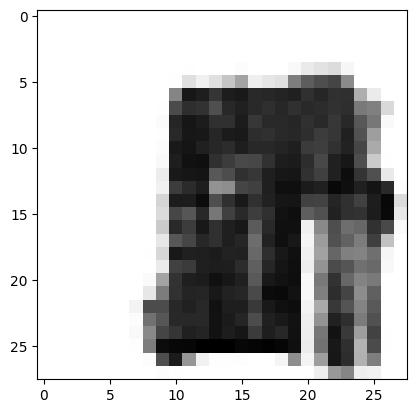

In [37]:
model = load_model('/content/generator_model_005.h5')

vector = np.random.randn(100 * 1)
vector = vector.reshape(1, latent_dim)

X = model.predict(vector)

plt.imshow(X[0, :, :, 0], cmap='gray_r')
plt.show()